In [1]:
## 顯示包含特定類別的影像
import numpy as np
import matplotlib

# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from pycocotools.coco import COCO
import os
import random
from collections import defaultdict, OrderedDict
import json
from tqdm import tqdm
import sys
from IPython.display import display
import cv2

random.seed(10)



loading annotations into memory...
Done (t=2.15s)
creating index...
index created!


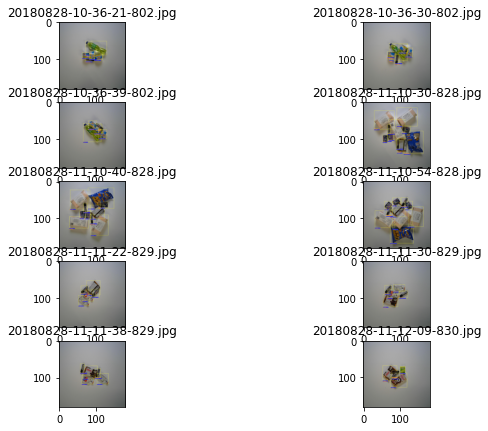

In [4]:
# json_path = r'D:\datasets\retail_product_checkout\instances_test2019.json'
#
# rpc_coco = COCO(annotation_file=json_path)
#
# catIds = [200]
#
# cats = rpc_coco.loadCats(catIds)
# cat_names = [cat["name"] for cat in cats]
# cat_names = ' '.join(cat_names)
#
# filenames = [i['file_name'] for i in rpc_coco.loadImgs(rpc_coco.getImgIds(catIds=catIds))]
# random.shuffle(filenames)
# filenames = filenames[:10]
# images = []
# for filename in filenames:
#     # images.append(mpimg.imread(os.path.join(r'D:/datasets/retail_product_checkout/test2019', filename)))
#     images.append(mpimg.imread(os.path.join(r'E:\rpc_inference\origin', filename)))
#     # images.append(cv2.imread(os.path.join(r'E:\rpc_inference\origin', filename)))
# filename_img = list(zip(filenames, images))
#
# plt.gcf().set_dpi(144)
# plt.figure(figsize=(10, 10))
# columns = 3
# for i, data in enumerate(images):
#     plt.subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
#     # fig.add_subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
#     plt.imshow(data[1])
# # plt.show()
# plt.savefig('{}-result.png'.format(cat_names))

coco_annotation_file_path = r"D:\datasets\retail_product_checkout\instances_test2019.json"
COCO_TEST = COCO(annotation_file=coco_annotation_file_path)
catIds = [200]

cats = COCO_TEST.loadCats(catIds)
cat_names = [cat["name"] for cat in cats]
cat_names = ' '.join(cat_names)

filenames = [i['file_name'] for i in COCO_TEST.loadImgs(COCO_TEST.getImgIds(catIds=catIds))]
filenames.sort()
image_num = 10
filenames = filenames[:image_num]

images = []
for filename in filenames:
    img = Image.open(os.path.join(r'E:\rpc_inference\origin', filename))
    # img = mpimg.imread(os.path.join(r'E:\rpc_inference\origin', filename))
    resize = img.resize((np.array(img.size) / 10).astype(int))
    images.append(resize)

# plt.figure(figsize=(10, 10 * image_num))
fig = plt.figure(figsize=(10, 10))
# fig = plt.figure(figsize=(30, 30))
# columns = 1
cols = 2
rows = int(len(images) / cols + 1) + 1
axes = []
for i, image in enumerate(images):
    # ax = plt.subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
    # ax = plt.subplot(int(len(images) / columns + 1) + 1, columns, figure=(30, 30))
    # ax.set_title(filenames[i])
    # plt.imshow(image)

    # fig.add_subplot(rows, cols, i + 1)
    # plt.imshow(image)

    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = (filenames[i])
    axes[-1].set_title(subplot_title)
    plt.imshow(image)
# fig.tight_layout()
plt.show()
# plt.savefig('{}-result.png'.format(cat_names))
